In [1]:
import math  
import meep as mp
from meep import mpb

/home/311514090/anaconda3/envs/mp/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/311514090/anaconda3/envs/mp/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/311514090/anaconda3/envs/mp/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/311514090/anaconda3/envs/mp/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [2]:
def print_heading(h):
    stars = "*" * 10
    print("{0} {1} {0}".format(stars, h))


In [3]:
num_bands = 8

In [4]:
k_points = [mp.Vector3(1,0,0),           #X
            mp.Vector3(1,0.25,0.25),     #U
            mp.Vector3(0.5,0.5,0.5),     #L
            mp.Vector3(0,0,0),           #Gamma
            mp.Vector3(1,0,0),           #X
            mp.Vector3(1,0.5,0.5),       #W
            mp.Vector3(0.75,0.75,0),     #K
           ]

In [5]:
k_points = mp.interpolate(4, k_points)

In [6]:
geometry = [mp.Sphere(0.5, material=mp.Medium(epsilon=13))]

In [7]:
resolution = 32

In [8]:
ms = mpb.ModeSolver(num_bands=num_bands,
                    k_points=k_points,
                    geometry=geometry,
                    resolution=resolution)

In [9]:
#%%capture
print_heading("Square lattice of rods: TE bands")
ms.run_te()

********** Square lattice of rods: TE bands **********
Initializing eigensolver data
Computing 8 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 32 x 32 x 32.
Solving for 8 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 1
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     sphere, center = (0,0,0)
          radius 0.5
Geometric object tree has depth 4 and 64 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: zeven.
Initializing fields to random numbers...
31 k-points
  Vector3<1.0, 0.0, 0.0>
  Vector3<1.0, 0.05, 0.05>
  Vector3<1.0, 0.1, 0.1>
  Vector3<1.0, 0.15000000000000002, 0.15000000000000002>
  Vector3<1.0, 0.2, 0.2>
  Vector3<1.0, 0.25, 0.25>
  Vector3<0.9, 0.3, 0.3>
  Vector3<0.8, 0.35, 0.35>
  Vector3<0.7, 0.4, 0.4>
  Vector3<0.6, 0.45, 0.45>
  Vect

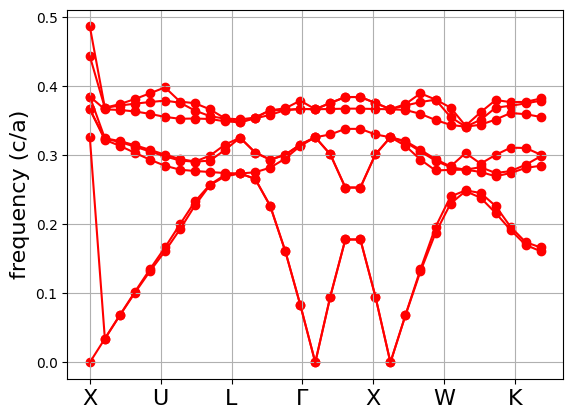

In [15]:
import matplotlib.pyplot as plt
freqs = ms.all_freqs
gaps = ms.gap_list
fig, ax = plt.subplots()
x = range(len(freqs))
for xz, tz in zip(x, freqs):
    ax.scatter([xz]*len(tz), tz, color='red')
ax.plot(freqs, color='red')
#ax.set_ylim([0, 1])
#ax.set_xlim([x[1], x[-1]])
for gap in gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='red', alpha=0.2)
#ax.text(12, 0.04, 'TEbands', color='red', size=15)
points_in_between = (len(freqs) - 5) / 7
tick_locs = [i*points_in_between+i for i in range(7)]
tick_labs = ['X', 'U', 'L', 'Γ','X','W','K']
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labs, size=16)
ax.set_ylabel('frequency (c/a)', size=16)
ax.grid(True)

plt.show()